# Interrogate PCMDI-AMIP-1-1-9 data
## - ascertain issues due to upstream OISSTv2.0 problems

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >
</p>
</div>

## Notes

**Summary**

Quick and dirty notebook to plot PCMDI-AMIP-1-1-9 data to ascertain if issues exist

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Notes**

PJD  4 Mar 2024 - Started<br>

**Links**

### imports

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import xcdat as xc

### load published PCMDI-AMIP-1-1-9 data and check that

In [2]:
input4MIPsPath = "/p/user_pub/work/input4MIPs/CMIP6Plus/CMIP/PCMDI/PCMDI-AMIP-1-1-9"
tosPath = "ocean/mon/tos/gn/v20230512/tos_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn_187001-202212.nc"
siconcPath = "seaIce/mon/siconc/gn/v20230512/siconc_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn_187001-202212.nc"
maskPath = "ocean/fx/sftof/gn/v20230512/sftof_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn.nc"
t1 = xc.open_dataset(os.path.join(input4MIPsPath, tosPath))
s1 = xc.open_dataset(os.path.join(input4MIPsPath, siconcPath))
m1 = xc.open_dataset(os.path.join(input4MIPsPath, maskPath), decode_times=False)

### check tos, unmasked and masked

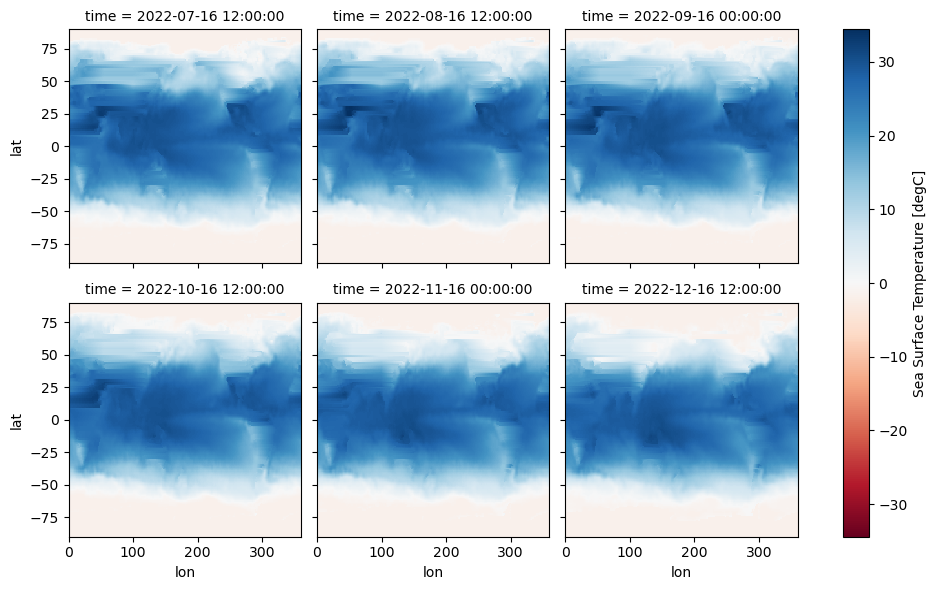

In [3]:
t1["tos"].isel(time=slice(-6,None)).plot(col='time',col_wrap=3,cmap='RdBu')

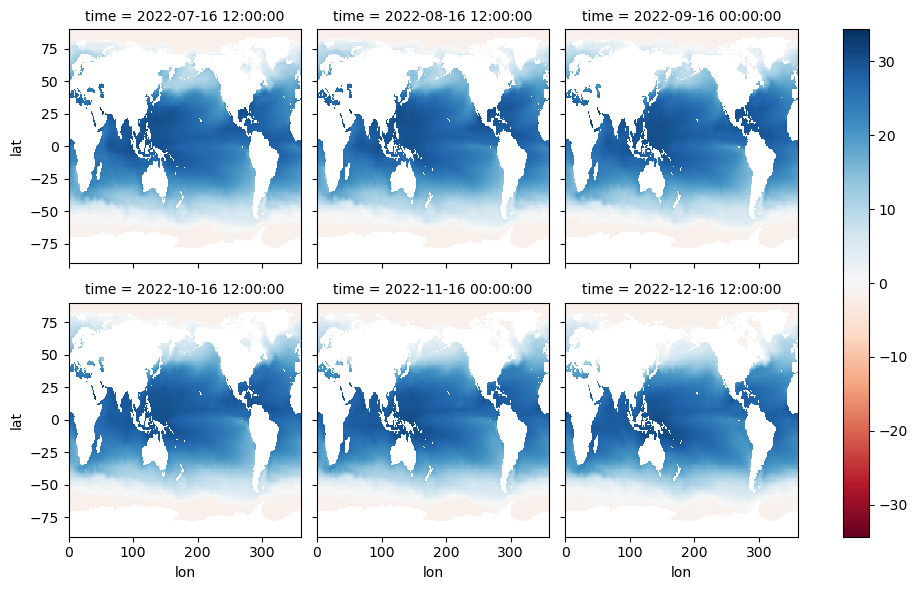

In [4]:
# apply landsea mask
tos = xr.where(m1["sftof"]==100, t1["tos"], np.nan) # mask where land, otherwise sea ice
tos.isel(time=slice(-6,None)).plot(col='time',col_wrap=3,cmap='RdBu')

### check siconc, unmasked and masked

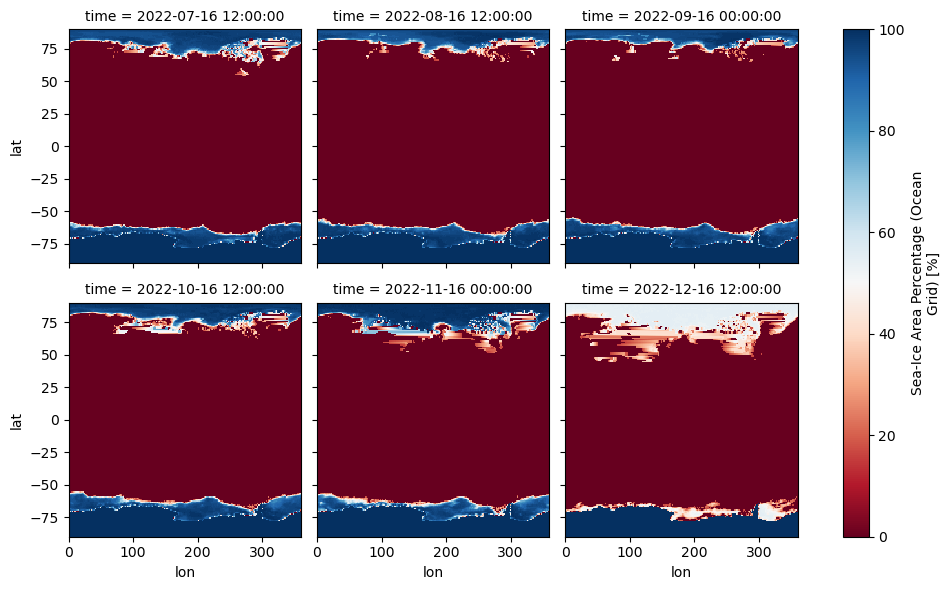

In [5]:
s1["siconc"].isel(time=slice(-6,None)).plot(col='time',col_wrap=3,cmap='RdBu')

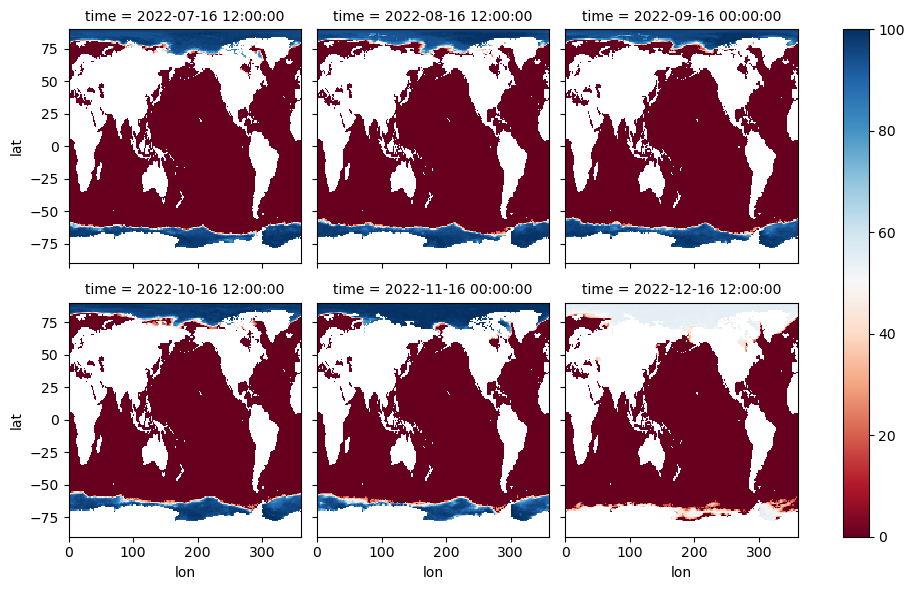

In [6]:
# apply landsea mask
siconc = xr.where(m1["sftof"]==100, s1["siconc"], np.nan) # mask where land, otherwise sea ice
siconc.isel(time=slice(-6,None)).plot(col='time',col_wrap=3,cmap='RdBu')

### what options are there for replacement?

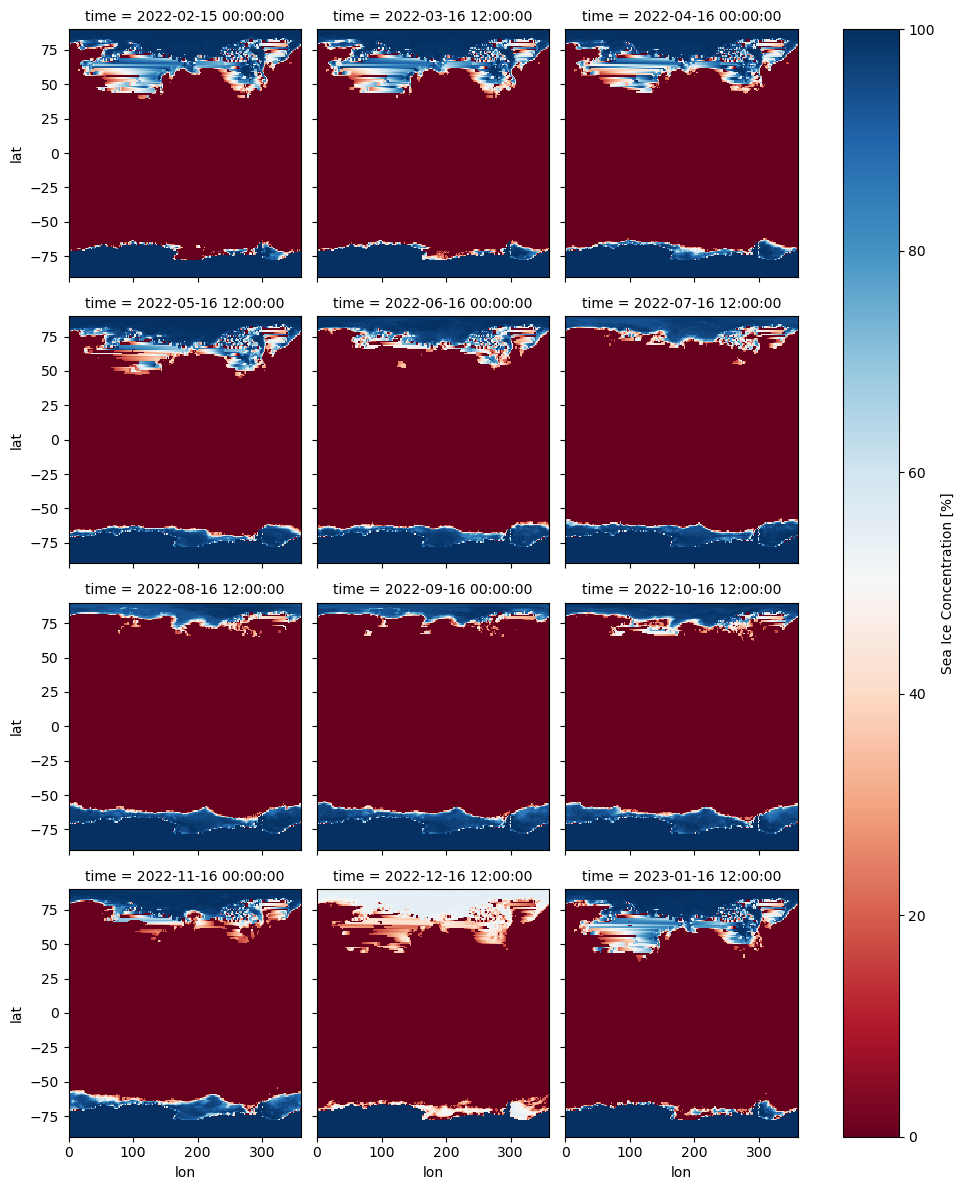

In [7]:
homePath = "/p/user_pub/climate_work/durack1/Shared/150219_AMIPForcingData"
ds3 = xc.open_dataset(os.path.join(homePath, "SST_1-1-9-release/MODEL.ICE.HAD187001-198110.OI198111-202301.nc"))
sftof = xc.open_dataset(os.path.join(input4MIPsPath, "ocean/fx/sftof/gn/v20230512/sftof_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn.nc"), decode_times=False)
ocn = sftof['sftof']
sic = ds3['SEAICE']
# plot siconc without mask
sic.isel(time=slice(-12,None)).plot(col='time',col_wrap=3,cmap='RdBu')

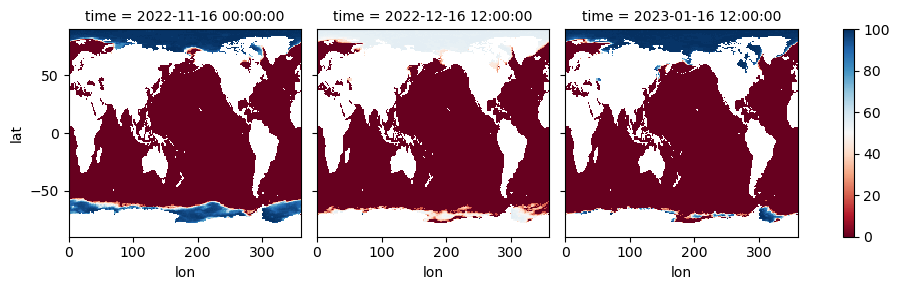

In [8]:
# apply landsea mask
ice = xr.where(ocn==100, sic, np.nan) # mask where land, otherwise sea ice
ice.isel(time=slice(-3,None)).plot(col='time',col_wrap=3,cmap='RdBu')

# other code samples below

### Mark examples

In [9]:
ds=xc.open_dataset('/p/user_pub/PCMDIobs/obs4MIPs_input/MOHC/HadISST1-1/v20230526/HadISST.1.1.sst.nc', lon_orient=(0, 360))
ds['sst'][-10:,90,-2:]

<xarray.DataArray 'sst' (time: 10, longitude: 2)> Size: 80B
array([[25.73793 , 25.73793 ],
       [24.996426, 24.996426],
       [24.560078, 24.560078],
       [25.09295 , 25.09295 ],
       [26.421085, 26.421085],
       [27.026783, 27.026783],
       [27.622698, 27.622698],
       [28.443634, 28.443634],
       [28.869377, 28.869377],
       [28.946148, 28.946148]], dtype=float32)
Coordinates:
    latitude   float32 4B -0.5
  * time       (time) object 80B 2022-06-16 12:00:00 ... 2023-03-16 12:00:00
  * longitude  (longitude) float32 8B 359.5 360.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [10]:
len(ds.longitude)

361

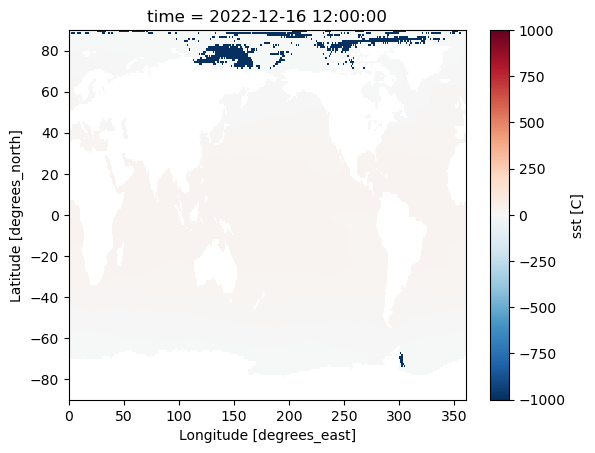

In [11]:
ds['sst'].sel(time='2022-12-16').plot()

### interrogate local non-published data

In [12]:
homePath = "/p/user_pub/climate_work/durack1/Shared/150219_AMIPForcingData"
ds1 = xc.open_dataset(os.path.join(homePath, "SST_1-1-9-release/MODEL.SST.HAD187001-198110.OI198111-202301.nc")) ; # ds1
ds2 = xc.open_dataset('/p/user_pub/PCMDIobs/obs4MIPs_input/NOAA-PSL/OISST2-0/v20230526/OISST.2.0.sst.mnmean.nc')
#ds3 = xc.open_dataset('SST_1-1-0-release/230503/oiv2mon.202212')
# https://kpegion.github.io/Pangeo-at-AOES/examples/read-fortran-binary.html

2025-03-04 16:45:25,896 [WARNING]: dataset.py(decode_time:361) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2025-03-04 16:45:25,896 [WARNING]: dataset.py(decode_time:361) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.


In [13]:
ds2

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2, bnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 4kB 1981-12-01 00:00:00 ... 2023-01-01 00:00:00
Dimensions without coordinates: nbnds, bnds
Data variables:
    sst        (time, lat, lon) float32 128MB ...
    time_bnds  (time, nbnds) object 8kB ...
    lon_bnds   (lon, bnds) float32 3kB 0.0 1.0 1.0 2.0 ... 359.0 359.0 360.0
    lat_bnds   (lat, bnds) float32 1kB 90.0 89.0 89.0 88.0 ... -89.0 -89.0 -90.0
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

i: 0
i: 1


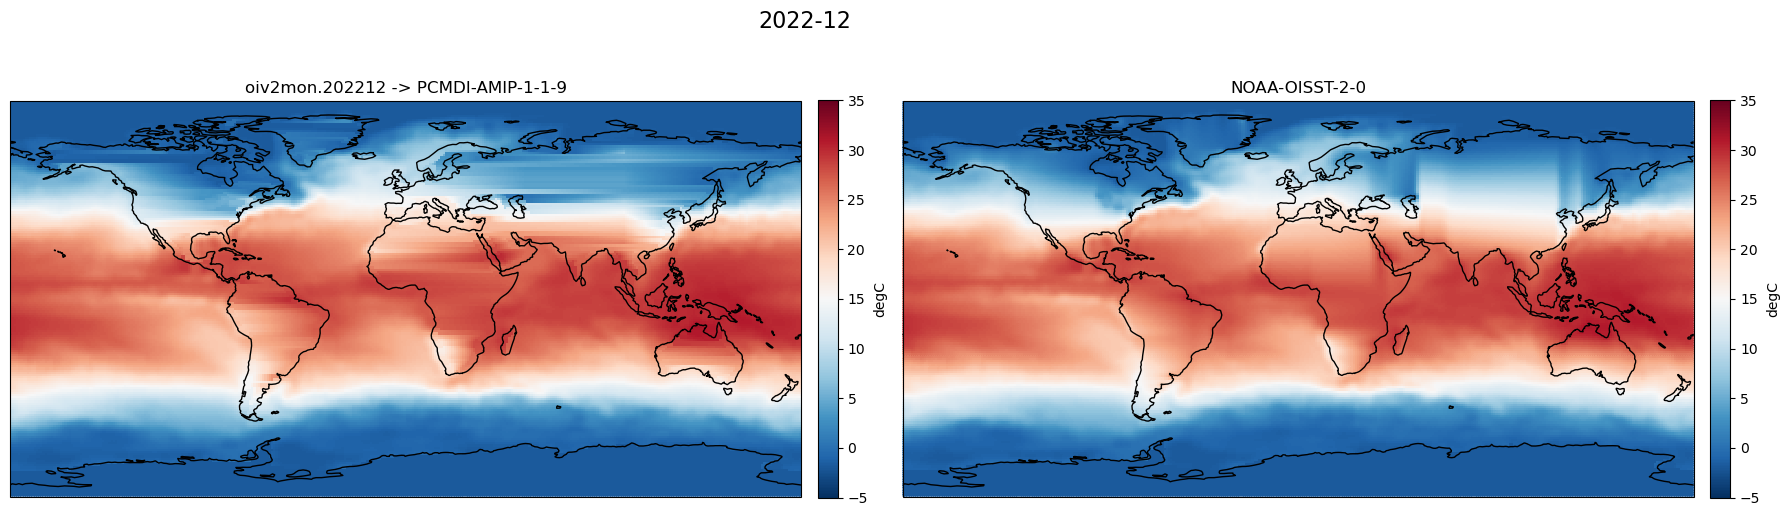

In [14]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))
fig.suptitle('2022-12',x=.45,y=0.95,fontsize=16)

# axes is a 2 dimensional array of `GeoAxes` - flatten into 1-D array
axes = axes.flatten()

# Loop over data
for i in np.arange(0,2):
    print("i:", i)
    if i == 0:
        data = ds1['SST'].sel(time='2022-12-16')
        lons = ds1['lon']
        lats = ds1['lat']
        titleTxt = 'oiv2mon.202212 -> PCMDI-AMIP-1-1-9'
    elif i == 1:
        data = ds2['sst'].sel(time='2022-12-01')
        lons = ds2['lon']
        lats = ds2['lat']
        titleTxt = 'NOAA-OISST-2-0'

    # Colour plot
    cs = axes[i].pcolor(lons, lats, data.squeeze(),
                      transform = ccrs.PlateCarree(),
                      cmap='RdBu_r', vmin=-5, vmax=35)
    # add colorbar
    fig.colorbar(cs, ax=axes[i], fraction=0.024, pad=0.02, label='degC')
    # Title each subplot
    axes[i].set_title(titleTxt)
    # Draw the coastines
    axes[i].coastlines()

plt.tight_layout()
plt.show()